<h1><center> Laboratorio di WebScraping </h1>
<h1><center> Anno Accademico 2024-2025 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 19 </h1>
<h1><center>  Serie temporali </h1> 
<h1><center> 11 Aprile 2025 </h1>

## Serie Temporali

* molto utilizzate per analisi di **dati finanziari**
* sequenze di dati raccolti nel tempo. 
    * generalmente, il tempo è equidistante tra due punti consecutivi
    * ...ma potrebbero esistere lacune nella sequenza osservata. 
* Pandas include funzionalità per 
    * manipolare le date
    * aggregare su diversi periodo 
    * interpolare su diversi periodi
    * statistiche legate all'evoluzione temporale dei dati 

## Tempo in Python

* modulo **datetime** fornisce tre tipi di dati
    * **date**: anno, mese e giono
    * **time**: minuti, secondi e microsecondi (un milionesimo di secondo), non associati ad una data specifica
    * **datetime**: combina gli elementi di una data che di un orario.

## Tempo in Python

In [1]:
from rich import inspect
from datetime import datetime
now = datetime.now()
print(now)
inspect(now)

2025-04-11 09:49:18.011076


╭───────────────────────── <class 'datetime.datetime'> ──────────────────────────╮
│ datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]]) │
│                                                                                │
│ ╭────────────────────────────────────────────────────────────────────────────╮ │
│ │ datetime.datetime(2025, 4, 11, 9, 49, 18, 11076)                           │ │
│ ╰────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                │
│         day = 11                                                               │
│        fold = 0                                                                │
│        hour = 9                                                                │
│         max = datetime.datetime(9999, 12, 31, 23, 59, 59, 999999)              │
│ microsecond = 11076                                                            │
│         min = datetime.datetime(1, 1, 1, 0, 0)                                 │
│      minute = 49                                                               │
│       month = 4                                                                │
│  resolution = datetime.timedelta(microseconds=1)                               │
│      second = 18                                                               │
│      tzinfo = None                                                             │
│        year = 2025                                                             │
╰────────────────────────────────────────────────────────────────────────────────╯

## La libreria rich

* permette di stampare testo colorato, tabelle, barre di avanzamento, log, JSON direttamente in una cella del notebook con un output chiaro, colorato e e ben formattato.

In [2]:
from rich import print_json
json_data = '{"name": "Alice", "age": 30, "city": "Rome"}'
print_json(json_data)

{
  "name": "Alice",
  "age": 30,
  "city": "Rome"
}

## La libreria rich

In [3]:
from rich import inspect
my_dict = {"a": 1, "b": 2, "c": 3}
inspect(my_dict)

╭──────────────────────────── <class 'dict'> ────────────────────────────╮
│ dict() -> new empty dictionary                                         │
│ dict(mapping) -> new dictionary initialized from a mapping object's    │
│     (key, value) pairs                                                 │
│ dict(iterable) -> new dictionary initialized as if via:                │
│     d = {}                                                             │
│     for k, v in iterable:                                              │
│         d[k] = v                                                       │
│ dict(**kwargs) -> new dictionary initialized with the name=value pairs │
│     in the keyword argument list.  For example:  dict(one=1, two=2)    │
│                                                                        │
│ ╭────────────────────────────────────────────────────────────────────╮ │
│ │ {'a': 1, 'b': 2, 'c': 3}                                           │ │
│ ╰────────────────────────────────────────────────────────────────────╯ │
│                                                                        │
│ 35 attribute(s) not shown. Run inspect(inspect) for options.           │
╰────────────────────────────────────────────────────────────────────────╯

## Time in Python

* una volta ispezionati gli attributi dell'oggetto **datetime** è quindi possibile accedervi per stamparli

In [4]:
print(now.max)

9999-12-31 23:59:59.999999


## Time in Python

In [5]:
from datetime import datetime
bday = datetime(1991, 7, 16, 10, 15)
print(bday)

1991-07-16 10:15:00


In [6]:
# Trovare il  umero di giorni tra due date
dt = datetime(2024, 4, 24) - bday
dt.days

11970

## Numpy: vectorized datetimes

* **numpy** possiede la sua versione ottimizzata 
* **np.datetime64** più efficiente e scalabile
* precisione a **64 bit**
* trade off tra **risoluzione temporale** e **massimo intervallo di tempo rappresentabile**

In [7]:
import numpy as np
date = np.array('1991-07-16', dtype=np.datetime64)
date

array('1991-07-16', dtype='datetime64[D]')

In [8]:
date + np.arange(32)

array(['1991-07-16', '1991-07-17', '1991-07-18', '1991-07-19',
       '1991-07-20', '1991-07-21', '1991-07-22', '1991-07-23',
       '1991-07-24', '1991-07-25', '1991-07-26', '1991-07-27',
       '1991-07-28', '1991-07-29', '1991-07-30', '1991-07-31',
       '1991-08-01', '1991-08-02', '1991-08-03', '1991-08-04',
       '1991-08-05', '1991-08-06', '1991-08-07', '1991-08-08',
       '1991-08-09', '1991-08-10', '1991-08-11', '1991-08-12',
       '1991-08-13', '1991-08-14', '1991-08-15', '1991-08-16'],
      dtype='datetime64[D]')

## La classe Timestamp di PANDAS

* **Pandas** è il framework principale per l'analisi delle serie temporali in Python
* oggetto di base è **Timestamp** che combina
    * alcune funzionalità già presenti **datetime** di **Python**
    * l' efficienza di **numpy.datetime64**
    * ed estende con nuove funzionalità
* come una **Series** è una estensione delle **lista Python**, l'oggetto **Timestamp** lo è dell'oggetto **datetime** 

## La classe Timestamp

In [9]:
import pandas as pd
import numpy as np
from rich import inspect
date = pd.to_datetime("16th of July, 1991")
inspect(date)

╭─────── <class 'pandas._libs.tslibs.timestamps.Timestamp'> ────────╮
│ Pandas replacement for python datetime.datetime object.           │
│                                                                   │
│ ╭───────────────────────────────────────────────────────────────╮ │
│ │ Timestamp('1991-07-16 00:00:00')                              │ │
│ ╰───────────────────────────────────────────────────────────────╯ │
│                                                                   │
│             asm8 = np.datetime64('1991-07-16T00:00:00.000000000') │
│              day = 16                                             │
│      day_of_week = 1                                              │
│      day_of_year = 197                                            │
│        dayofweek = 1                                              │
│        dayofyear = 197                                            │
│    days_in_month = 31                                             │
│      daysinmonth = 31                                             │
│             fold = 0                                              │
│             hour = 0                                              │
│     is_leap_year = False                                          │
│     is_month_end = False                                          │
│   is_month_start = False                                          │
│   is_quarter_end = False                                          │
│ is_quarter_start = False                                          │
│      is_year_end = False                                          │
│    is_year_start = False                                          │
│              max = Timestamp('2262-04-11 23:47:16.854775807')     │
│      microsecond = 0                                              │
│              min = Timestamp('1677-09-21 00:12:43.145224193')     │
│           minute = 0                                              │
│            month = 7                                              │
│       nanosecond = 0                                              │
│          quarter = 3                                              │
│       resolution = Timedelta('0 days 00:00:00.000000001')         │
│           second = 0                                              │
│               tz = None                                           │
│           tzinfo = None                                           │
│             unit = 'ns'                                           │
│            value = 679622400000000000                             │
│             week = 29                                             │
│       weekofyear = 29                                             │
│             year = 1991                                           │
╰───────────────────────────────────────────────────────────────────╯

## La classe Timestamp

* molti attributi sono simili a quelli della classe **datetime.datetime**
* qualche proprietà extra
    * **freq** indica la frequenza di campionamento e sarà utile per manipolare **time series**
* è molto più flessibile sul tipo dei parametri a partire dai quali si crea un timestamp
* la funzione **pd.to_datetime()** crea un oggetto di tipo **TimeStamp**

In [10]:
pd.Timestamp('2025-11/04')

Timestamp('2025-11-04 00:00:00')

In [11]:
pd.Timestamp(2000000000000000)

Timestamp('1970-01-24 03:33:20')

In [12]:
pd.to_datetime('2025-4-11')

Timestamp('2025-04-11 00:00:00')

## La classe Timestamp

In [13]:
import pandas as pd 
from datetime import datetime 
time_stamp = pd.Timestamp(datetime(2017, 1, 1))
pd.Timestamp('2017-01-01') == time_stamp

True

In [14]:
time_stamp 

Timestamp('2017-01-01 00:00:00')

In [15]:
time_stamp.year

2017

In [16]:
time_stamp.day_name()

'Sunday'

## La classe Timestamp: slicing

In [88]:
import pandas as pd  
import numpy as np  
date_rng = pd.date_range(start='2024-01-01', periods=10, freq='D')
ts = pd.Series(np.random.randn(len(date_rng)), index=date_rng)
ts

2024-01-01    1.396175
2024-01-02   -2.010244
2024-01-03   -0.464704
2024-01-04    0.366324
2024-01-05    0.500489
2024-01-06    0.195562
2024-01-07   -1.488147
2024-01-08   -1.509630
2024-01-09    0.851509
2024-01-10   -0.083717
Freq: D, dtype: float64

## La classe timestamp: slicing e loc

In [90]:
ts_slice = ts['2024-01-03':'2024-01-07']
ts_slice

2024-01-03   -0.464704
2024-01-04    0.366324
2024-01-05    0.500489
2024-01-06    0.195562
2024-01-07   -1.488147
Freq: D, dtype: float64

In [94]:
ts.loc['2024-01']

2024-01-01    1.396175
2024-01-02   -2.010244
2024-01-03   -0.464704
2024-01-04    0.366324
2024-01-05    0.500489
2024-01-06    0.195562
2024-01-07   -1.488147
2024-01-08   -1.509630
2024-01-09    0.851509
2024-01-10   -0.083717
Freq: D, dtype: float64

## Datetime index: creare una serie temporale

* l'utilità vera delle librerie precedenti è poter **indicizzare dati in base ai timestamp**
* **DatetimeIndex**
    * un particolare indice formato da oggetti di tipo **Timestamp** 
* **time series**
   * una serie di oggetti con un indice di tipo **Datetimeindex** 
  

## Google stock options

In [17]:
import pandas as pd
google=pd.read_csv('DataSets/google.csv') 
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [18]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


## Google stock options

In [19]:
google['Date'] = pd.to_datetime(google['Date']) 
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [20]:
google.set_index('Date', inplace=True) 
google

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


## Il tipo DatetimeIndex

In [21]:
type(google.index)

pandas.core.indexes.datetimes.DatetimeIndex

## In modo più sintetico....

In [22]:
google1 = pd.read_csv('DataSets/google.csv',parse_dates=['Date'],index_col='Date')
google1

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10
...,...
2016-12-26,NaN
2016-12-27,791.55
2016-12-28,785.05


## Operazioni sulla time series

* parsing delle date come stringhe e conversione in datetime64
* selezione e slicing per sottoperiodi specifici
* impostazione e modifica della frequenza dell'indice DateTimeindex
* backward o forward shift dei valori della serie
* aumento o riduzione della frequenza dei dati e aggregazione su diversi periodi
    

## Shift della serie temporale

In [23]:
# default: periods=1
google['shifted'] = google.Close.shift() 
google.head(5)

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN
2014-01-06,558.10,NaN


## Lag della serie temporale

In [24]:
google['lagged'] = google.Close.shift(periods=-1)
google[['Close', 'lagged', 'shifted']].tail(3)

,Close,lagged,shifted
Date,,,
2016-12-28,785.05,782.79,791.55
2016-12-29,782.79,771.82,785.05
2016-12-30,771.82,NaN,782.79


## Calcolo della percentuale di variazione

In [25]:
google['change'] = google.Close.div(google.shifted) 
google[['Close', 'shifted', 'change']].head(7)

,Close,shifted,change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,556.00,0.992716
2014-01-04,NaN,551.95,NaN
2014-01-05,NaN,NaN,NaN
2014-01-06,558.10,NaN,NaN
2014-01-07,568.86,558.10,1.019280
2014-01-08,570.04,568.86,1.002074


## Calcolo della percentuale di variazione

In [86]:
google['return_3d'] = google.Close.pct_change(3,fill_method=None)
google[['Close', 'return_3d']].head()

,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-04,NaN,NaN
2014-01-05,NaN,NaN
2014-01-06,558.10,0.011142


* **pct_change()** calcola la variazione percentuale tra i valori consecutivi di una Serie o di un DataFrame.

## Operazioni sulla time series: resampling

* processo di modifica della frequenza dei dati in una serie temporale. 
* analizzare i dati a diversi livelli di **granularità**
* viene comunemente utilizzato per 
    * **aggregare**/**ridurre** la frequenza dei dati, ad esempio, convertire dati a livello di minuti in dati orari, **upsampling** 
    * **aumentare** la frequenza dei dati, ad esempio, convertire dati giornalieri in dati orari, spesso con **interpolazione**,
       **downsampling**


## Operazioni sulla time series: resampling

<center>
<img src="Figures/UpDownSampling.jpg" style="width:700px;height:400px;"/>

## Upsampling 

In [27]:
dates = pd.date_range(start='2016', periods=4, freq='QE')
data = range(1, 5)
quarterly = pd.DataFrame(data=data, index=dates)
quarterly

,0
2016-03-31,1
2016-06-30,2
2016-09-30,3
2016-12-31,4


* **QE quarterly End**: fine trimestre

## Upsampling

In [28]:
montly=quarterly.asfreq('ME')
montly

,0
2016-03-31,1.0
2016-04-30,NaN
2016-05-31,NaN
2016-06-30,2.0
2016-07-31,NaN
2016-08-31,NaN
2016-09-30,3.0
2016-10-31,NaN
2016-11-30,NaN
2016-12-31,4.0


## Upsampling e Filling

In [29]:
montly['ffill'] = quarterly.asfreq('ME', method='ffill')
montly['bfill'] = quarterly.asfreq('ME', method='bfill')
montly['value'] = quarterly.asfreq('ME', fill_value=0)
montly

,0,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


## Downsampling

In [30]:
import pandas as pd
ozone = pd.read_csv('DataSets/ozone_nyc.csv', parse_dates=['date'], index_col='date')
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


## Downsampling

In [31]:
ozone

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754
...,...
2017-03-27,0.005640
2017-03-28,0.013870
2017-03-29,0.034341


## Downsampling

In [32]:
ozone.resample('ME').agg(['mean', 'std'])

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409
...              ...       ...
2016-11-30  0.017062  0.007766
2016-12-31  0.014792  0.007325
2017-01-31  0.015309  0.007050
2017-02-28  0.021158  0.008358
2017-03-31  0.030808  0.008221

[207 rows x 2 columns]

* medie e varianze mensili assegnate alla fine del mese

## Downsampling

In [39]:
monthly = ozone.resample('ME').mean()
monthly

,Ozone
date,
2016-01-31,0.016361
2016-02-29,0.021119
2016-03-31,0.028030
2016-04-30,0.033459
2016-05-31,0.031141
2016-06-30,0.036785
2016-07-31,0.038736
2016-08-31,0.033249
2016-09-30,0.027260


## Downsampling

<Axes: xlabel='date'>

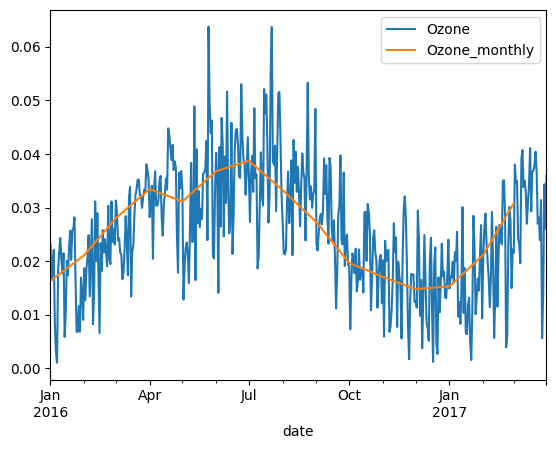

In [40]:
ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly.add_suffix('_monthly').plot(ax=ax)

## Resample

* funziona solo su oggetti di tipo **DateTimeIndex**
* primo parametro: la regola con cui si aggrega
* occorre specificare un metodo per aggregare ogni gruppo individuato
* simile alla **group_by**, ma più specifica per time series

## Resampling: Dati atmosferici

In [41]:
import pandas as pd
df = pd.read_csv('DataSets/occupancy+detection/datatest.txt')
df.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

## Resampling: Dati atmosferici

In [42]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [43]:
df = pd.read_csv('DataSets/occupancy+detection/datatest.txt',  parse_dates=["date"])
df.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

## Resampling: Dati atmosferici

In [44]:
df3 = df.set_index('date')
df3

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1


## Resampling: dati atmosferici

In [45]:
x=df3.resample('h').mean()
x.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:00:00,23.657118,27.023720,499.978107,898.784843,0.004889,1.000000
2015-02-02 15:00:00,23.293950,28.412430,456.719048,1103.186310,0.005030,1.000000
2015-02-02 16:00:00,22.773142,26.737452,434.838993,979.566003,0.004585,1.000000
2015-02-02 17:00:00,22.534520,24.972128,426.736158,822.562853,0.004217,0.610169
2015-02-02 18:00:00,21.993372,24.595967,32.984167,720.400278,0.004018,0.083333


## Resampling: dati atmosferici

In [46]:
x=df3.resample('1min').mean()
x.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:19:00,23.7090,26.281,581.800000,754.800000,0.004768,1.0
2015-02-02 14:20:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1.0
2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1.0
2015-02-02 14:23:00,23.7570,26.230,528.633333,784.500000,0.004773,1.0


## Resampling: dati atmosferici

In [47]:
x['Temperature'].isna().sum()

np.int64(534)

In [48]:
x[x['Temperature'].isna()]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-02 14:20:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02 14:24:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02 14:27:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02 14:33:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-02 14:40:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2015-02-04 10:26:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-04 10:29:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-04 10:35:00,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting 

<Axes: xlabel='date'>

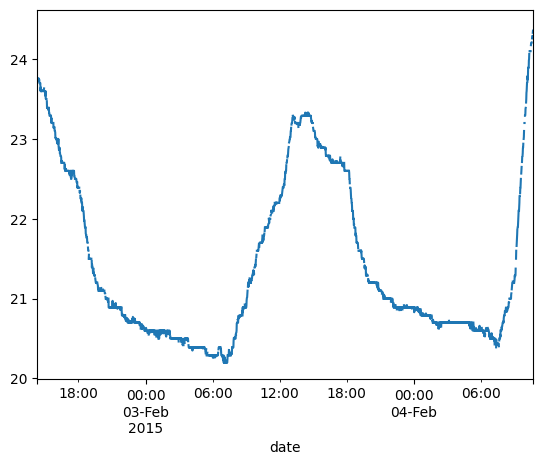

In [49]:
figsize=(8, 5)
x['Temperature'].plot()

## Plotting

<Axes: xlabel='date'>

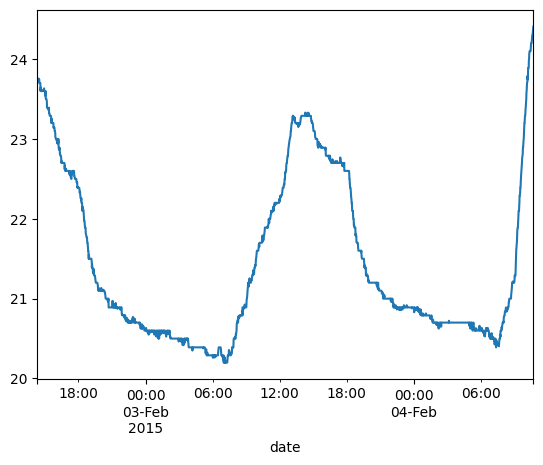

In [50]:
x['Temperature'].interpolate('linear').plot()

## Rolling windows

* identifica i sotto-periodi di una serie temporale (finestre)
* calcola le metriche all'interno di ogni finestra
* crea una nuova serie temporale di metriche
* due tipi di finestre:
    * **Rolling**: stessa dimensione, scorrevole
    * **Expanding**: contiene tutti i valori precedenti 

## Rolling windows

* un intervallo di dimensione fissa (finestra) che si muove sequenzialmente su un Dataset più ampio dell'intervallo
* posso appalicare ad ogni intervallo una funzione di **aggregazione**
* a differenza del **downsampling**
    * le finestre temporali **si sovrappongono**
    * la frequenza di campionamento è la stessa di quella del dataset originario
    

## Rolling windows

<center>
<img src="Figures/RollingWindow.jpg" style="width:800px;height:500px;"/>

## Rolling window

In [51]:
data = pd.read_csv('DataSets/ozone_nyc.csv', parse_dates=['date'], index_col='date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


## Rolling windows

* **media mobile**
* livella le fluttuazioni **stagionali**
* quando le fluttuazioni stagionali vengono smussate, si è  grado di vedere la tendenza complessiva dei dati

## Rolling windows

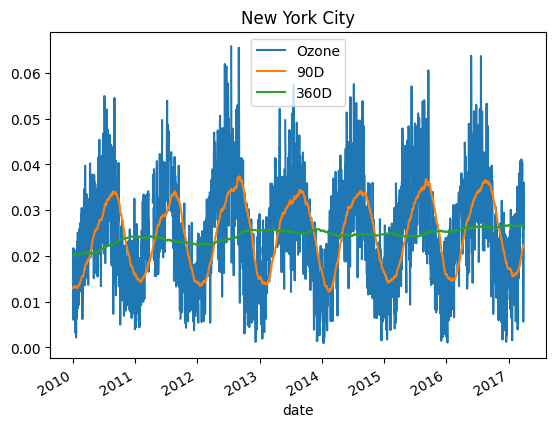

In [52]:
data['90D'] = data['Ozone'].rolling('90D').mean()
data['360D'] = data['Ozone'].rolling('360D').mean()
data.loc['2010':].plot(title='New York City');

## Rolling windows

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

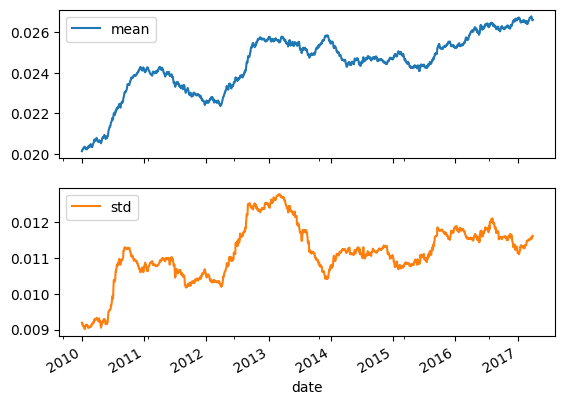

In [53]:
r = data.Ozone.rolling('360D').agg(['mean', 'std'])
r.loc['2010':].plot(subplots = True)

## Open Power System Data (OPSD) della Germania

* una time-series giornaliera con dati su vari tipi di **energie prodotte in Germania e sui consumi**
    * produzione e consumo di energia su base giornaliera valutate in **gigawatt-ore (GWh)**
    * focus sulle energie **rinnovabili**
* un file csv con le seguenti colonne
    * **Date**: la data (yyyy-mm-dd format)
    * **Consumption**: Electricity consumption in GWh
    * **Wind**:  Wind power production in GWh
    * **Solar**: Solar power production in GWh
    * **Wind+Solar**: somma della produzione wind e solar in GWh

## OPDS: analisi 

* analisi della produzione e del consumo di energia nel tempo
    * quando il consumo di energia è più alto o più basso?
    * la produzione di energia eolica e solare varia con le stagioni dell'anno?
    * quali sono i trend a lungo termine?
    * confronto tra la produzione di energia eolica e solare e consumo di energia elettrica ecome varia nel tempo?


## Open Power System Data (OPSD) della Germany

In [55]:
import pandas as pd
opsd_daily = pd.read_csv('DataSets/opsd_germany_daily.csv', parse_dates=['Date'])
opsd_daily.shape

(4383, 5)

In [59]:
opsd_daily.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


In [57]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [58]:
opsd_daily.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

## Costruire la time series

In [60]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [61]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

## Utilizzare le componenti dell'oggetto Timestamp

In [62]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.dayofweek
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,5
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,3
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,3
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,4
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,1


## Time-based indexing

In [63]:
opsd_daily.loc['2017-08-10']

Consumption     1351.491
Wind             100.274
Solar             71.160
Wind+Solar       171.434
Year            2017.000
Month              8.000
Weekday Name       3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [64]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


## Partial Timestamp indexing

In [65]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,2
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,3
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,4
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,5
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,6
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,0
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,1
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,2
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,3


## Time series: visualizzazione

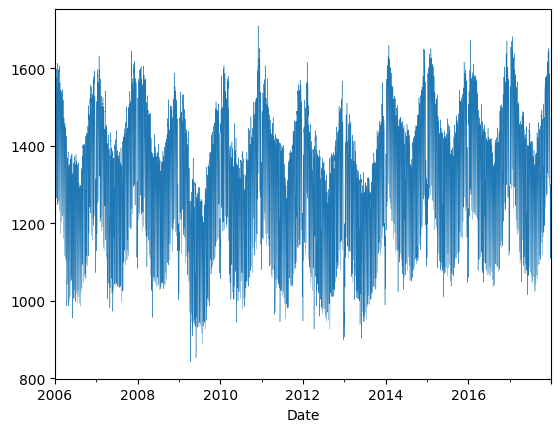

In [66]:
import matplotlib.pyplot as plt
opsd_daily['Consumption'].plot(linewidth=0.3);

* il metodo **plot()** ha scelto di inserire un tick ogni due anni e le label (gli anni) per l'asse delle x


## Time series: visualizzazione

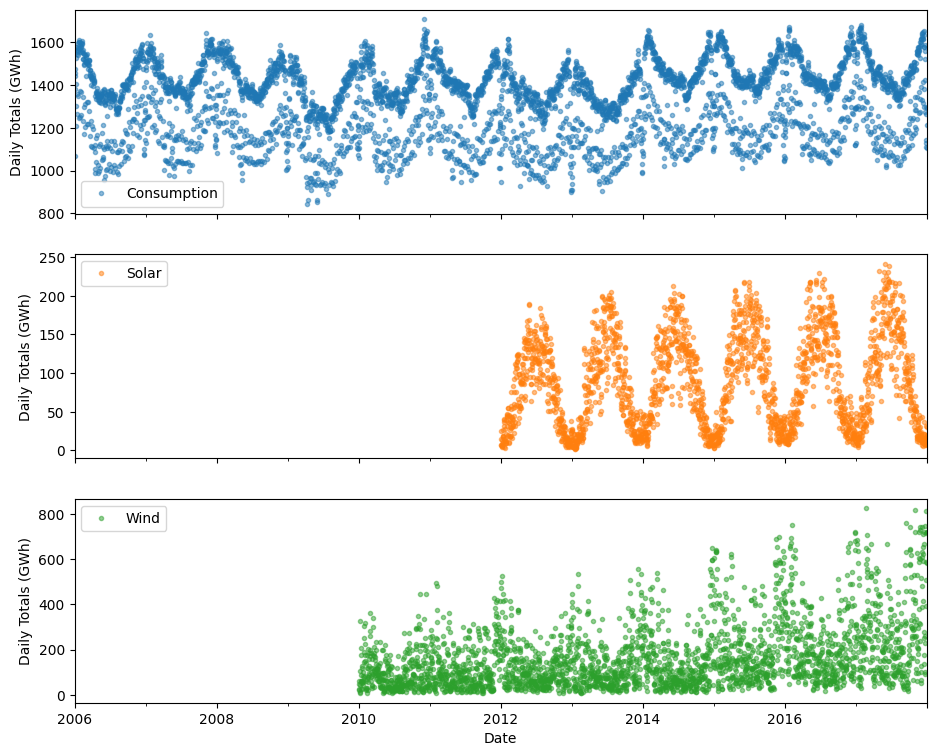

In [67]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')   

## Downsampling

In [68]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


## Downsampling

In [69]:
opsd_weekly_mean.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-03,1536.236314,284.334286,18.320857,302.655143
2017-12-10,1554.824946,636.514714,16.440286,652.955000
2017-12-17,1543.856889,442.531857,18.143714,460.675571
2017-12-24,1440.342401,339.018429,9.895143,348.913571
2017-12-31,1203.265211,604.699143,19.240143,623.939286


## Downsampling

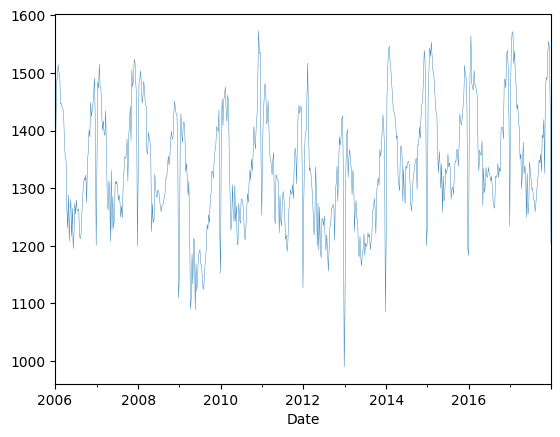

In [70]:
opsd_weekly_mean['Consumption'].plot(linewidth=0.3);

## Downsampling

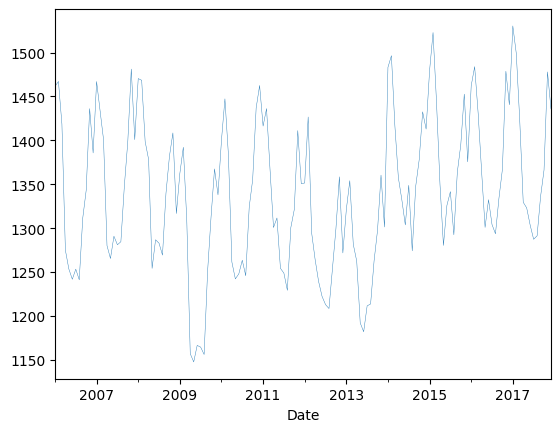

In [71]:
opsd_month_mean = opsd_daily[data_columns].resample('ME').mean()
opsd_month_mean['Consumption'].plot(linewidth=0.3);

## Time series: Seasonality

* tutti i tre diagrammi mostrano una forte **periodicità**, riferita come **seasonality**, nella analisi delle time series
    * un pattern che si ripete periodicamente a intervalli regolari
    * non sempre la caratteristica di  **seasonality** di una serie riguarda le stagioni metereologiche
    * ad esempio andamento vendite, maggiore a Novembre e a Dicembre
* Differenti scale di **seasonality**
    * week seasonality?
    * occorre zoommare nel singolo anno
    

## Time series: Week Seasonality

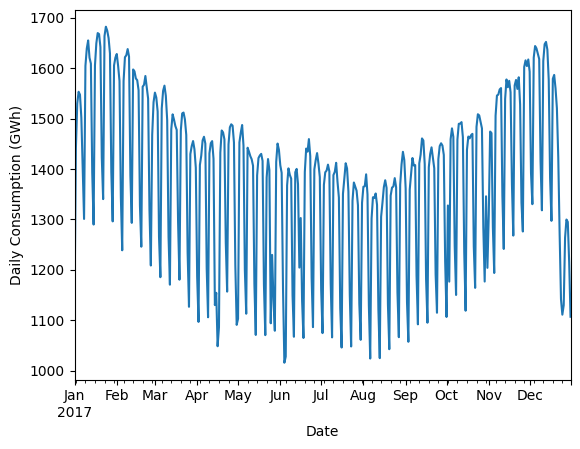

In [74]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

* il grafico presenta chairament la **week seasonality**
* si osserva anche la diminuzione di elettricità negli ultimi giorni di Dicembre e nei primi mesi di Gennaio, a causa delle vacanze


## TimeSeries: zoommare su un periodo

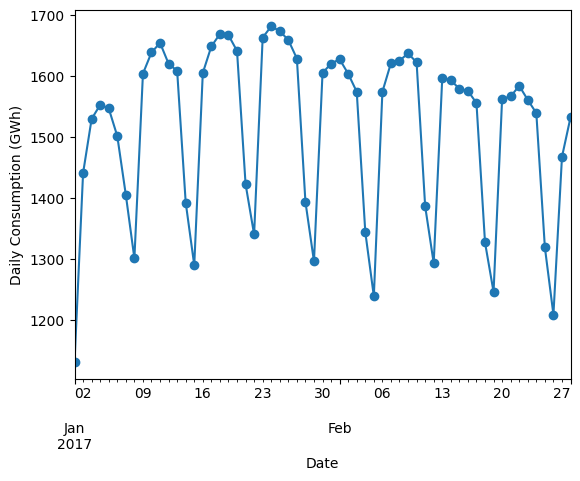

In [75]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

* maggiore consumo di energia durante i giorni feriali, e picco negativo nei giorni festivi


## Seasonality con i box plot

* è possibile utilizzare uno degli attributi dell'oggetto **TimeStamp** per creare i **boxplot**
* un unico boxplot per ogni **unità di tempo** 
    * esempio un box plot per ogni mese
    * se nel dataset un mese si ripete più volte, si considerano tutti i valori per quel mese, nei vari anni, e se ne calcola la distribuzione

## Seasonality con i box plot

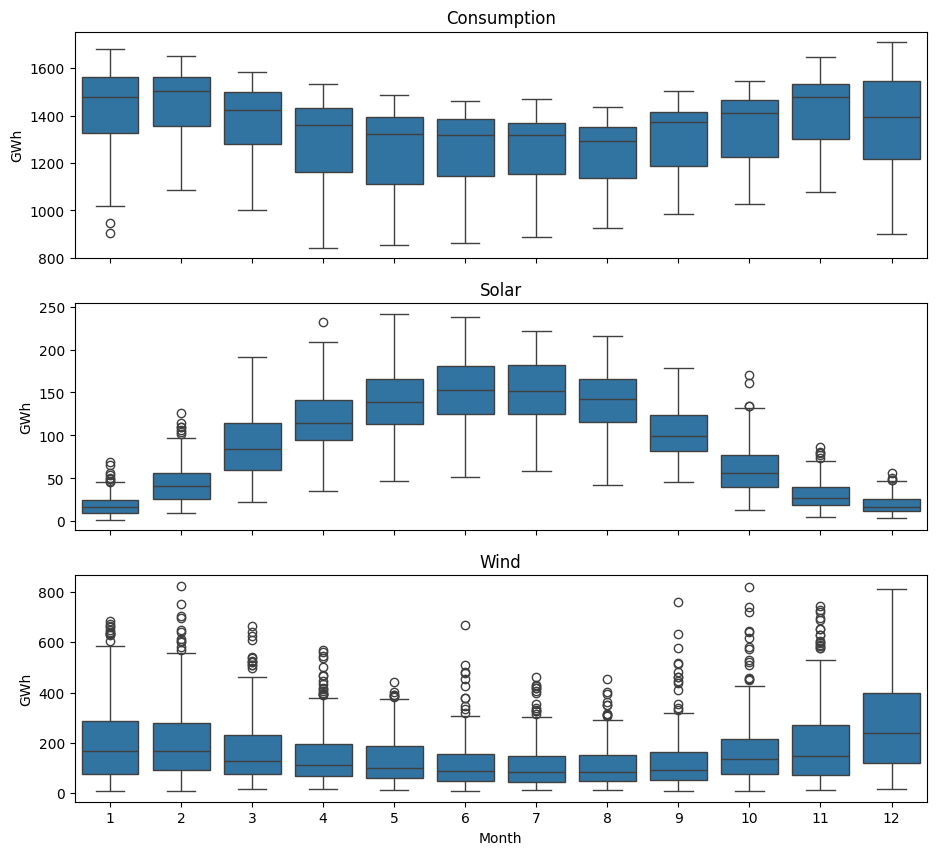

In [76]:
import seaborn as sns
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, y=name, x='Month', ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)   

## Seasonality con i box plot

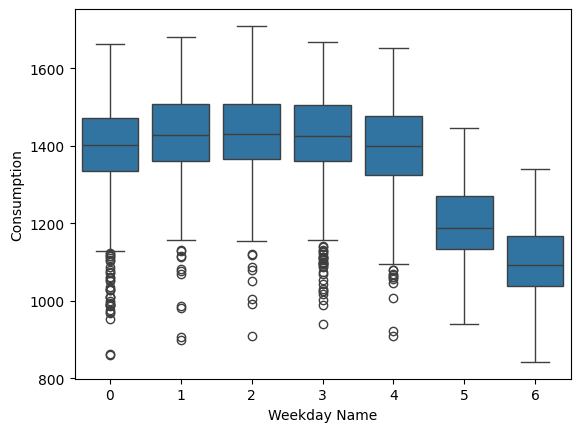

In [77]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

In [78]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


* la serie temporale include ora **1/7 dei dati originari**

## Daily e Weekly time series

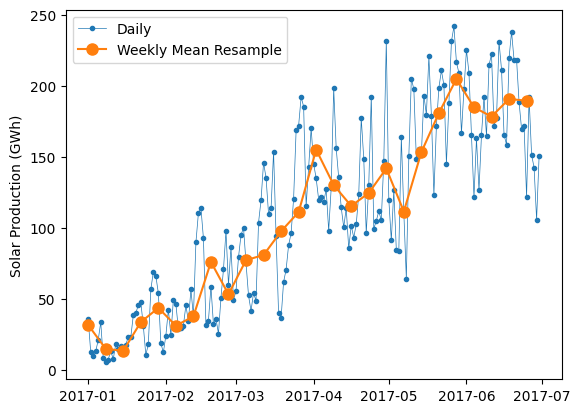

In [79]:
start, end = '2017-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

## Rolling windows

In [80]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


## Rolling window

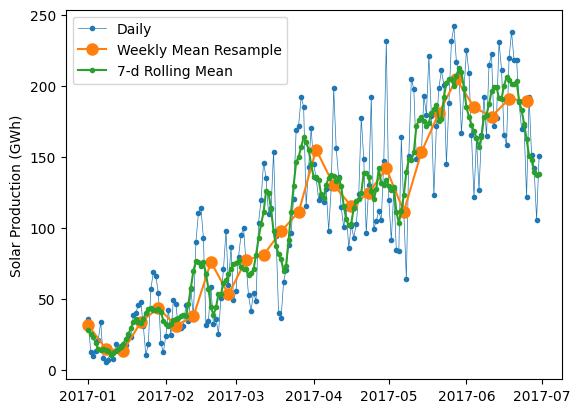

In [81]:
start, end = '2017-01', '2017-06'
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

## Rolling window

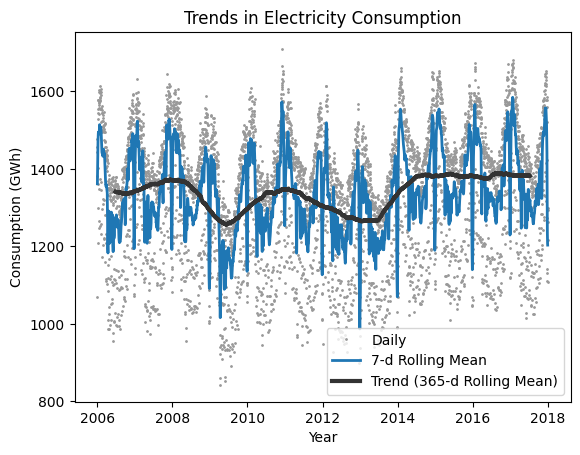

In [83]:
# The min_periods=360 argument accounts for a few isolated missing days in the
# wind and solar production time series
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');



## Rolling windows

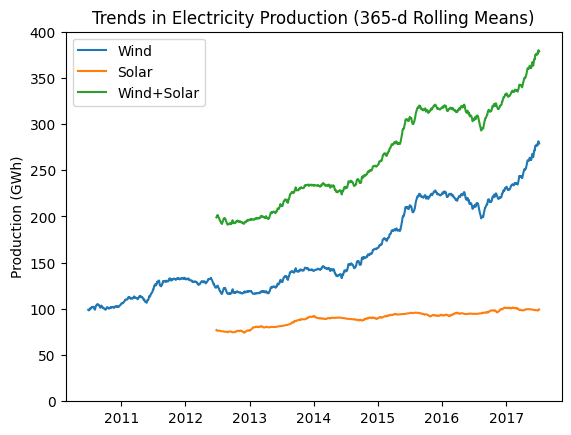

In [84]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
#    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');
    